# Police report statistics

In [1]:
import pandas as pd
from pandas.core.resample import TimeGrouper
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from datetime import datetime

## Read reports

In [2]:
pol_df=pd.read_json('policereports.json')

## Basic data inspection

In [3]:
pol_df.head()

,Content,CreatedAt,Dates,Id,Locations,Title,URL
0,Ein Unbekannter stahl in der vergangenen Nacht...,2018-11-12,[12.11.2018],2377,[Mitte],Replikat einer Medaille gestohlen,757243
1,In der vergangenen Woche sind die Mitarbeiteri...,2018-11-12,[12.11.2018],2376,[],Bilanz der gemeinsamen Verkehrsaktion gegen ve...,754532
2,Gemeinsame Meldung Polizei und Staatsanwaltsch...,2018-11-12,[12.11.2018],2375,[Spandau],Frau tot aufgefunden - Mordkommission ermittelt,757196
3,Mit der Veröffentlichung von Bildern aus einer...,2018-11-12,[12.11.2018],2374,[Tempelhof-Schöneberg],Nach schwerem Raub – Täter mit Bildern gesucht,756407
4,Nach einer Fahrkartenkontrolle in Rummelsburg ...,2018-11-12,[12.11.2018],2373,[Lichtenberg],Nach Fahrscheinkontrolle volksverhetzend und b...,756947


### Take only first date for easy processing

In [4]:
pol_df["Dates"] = pd.to_datetime(pol_df["Dates"].map(lambda dates: dates[0]),format="%d.%m.%Y")

### Set date as index 

In [5]:
pol_df.set_index('Dates', inplace=True)
pol_df.index = pol_df.index.tz_localize('GMT').tz_convert('CET')

### Filter police reports without district information

In [6]:
pol_df = pol_df[pol_df["Locations"].map(lambda locations: len(locations)>0)]

### Police reports per day and per month

In [7]:
pol_df_day = pol_df['Content'].resample('1d').count()
pol_df_month = pol_df['Content'].resample('1m').count()

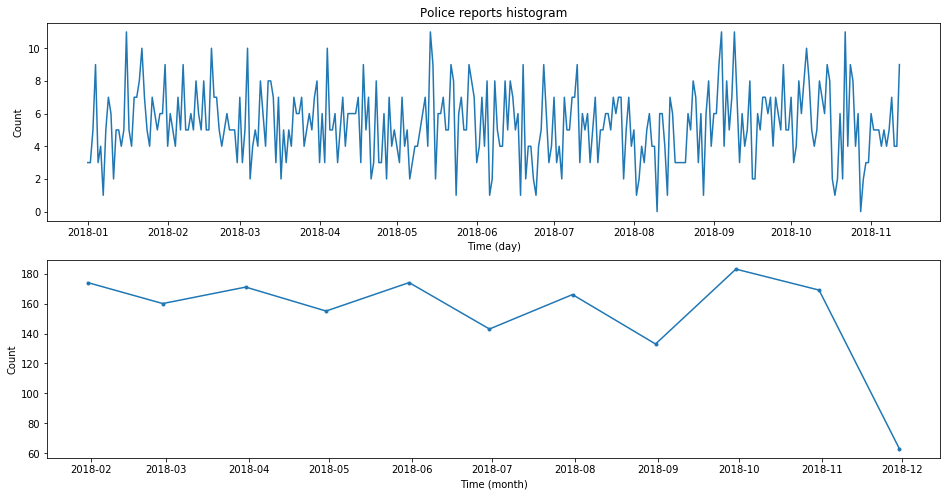

In [8]:
plt.figure(figsize=(16,8))
plt.subplot(2, 1, 1)
plt.plot(pol_df_day)
plt.title('Police reports histogram')
plt.xlabel('Time (day)')
plt.ylabel('Count')

plt.subplot(2, 1, 2)
plt.plot(pol_df_month, '.-')
plt.xlabel('Time (month)')
plt.ylabel('Count')

plt.show()

## Text processing

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist

In [10]:
polrep_contents = pol_df['Content']

Common Words of a Language to filter out

In [11]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/raimi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
stop = stopwords.words('german')
stop_custom = ['wurde', 'dass']

Clean the Tweets from a bunch of stuff we are not interested in

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/raimi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
tokens = []
for content in polrep_contents.values:
    tokens.extend(nltk.word_tokenize(content.lower()))
    
filtered_tokens = [w for w in tokens \
                   if not w in stop and not w in stop_custom \
                   and w.isalpha() and not len(w)<3 ]

### Most frequent words

In [15]:
freq_dist = nltk.FreqDist(filtered_tokens)
freq_dist

FreqDist({'uhr': 1813, 'ermittlungen': 1192, 'mann': 1025, 'straße': 773, 'richtung': 756, 'gestern': 752, 'zwei': 695, 'polizei': 681, 'polizisten': 663, 'verletzt': 650, ...})

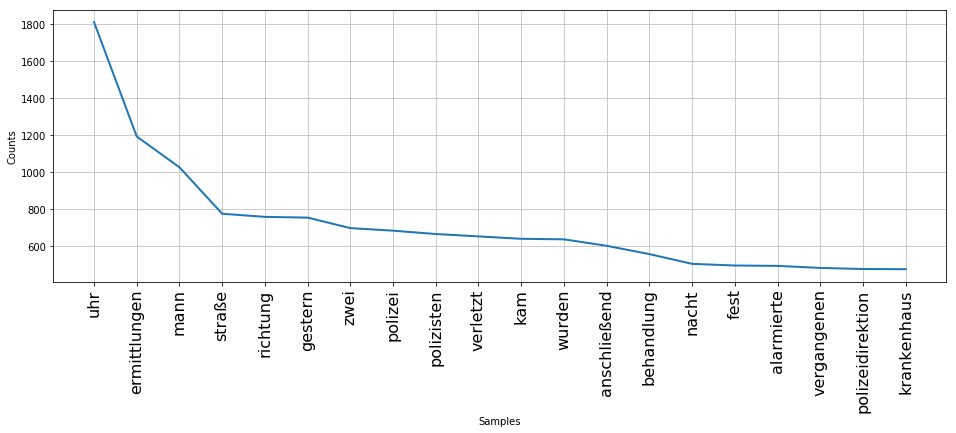

In [16]:
plt.figure(figsize=(16,5))
plt.xticks(size=16)
freq_dist.plot(20)

### Basic search

In [17]:
pol_df[pol_df["Content"].str.lower().str.contains('kottbusser')==True]

,Content,CreatedAt,Id,Locations,Title,URL
Dates,,,,,,
2018-09-28 02:00:00+02:00,Gestern Nachmittag kam es in Kreuzberg zu eine...,2018-11-12,2017,[Friedrichshain-Kreuzberg],Drei Polizisten verletzt,744108
2018-09-17 02:00:00+02:00,In Kreuzberg wurden gestern Abend zwei Brüder ...,2018-11-12,1935,[Friedrichshain-Kreuzberg],Zwei Schwerverletzte nach Raub,739537
2018-06-07 02:00:00+02:00,In der vergangenen Nacht wurde das Fahrzeug ei...,2018-11-12,1252,[Neukölln],Fahrzeug einer Objektschutzstreife mit Stein b...,709121
2018-06-06 02:00:00+02:00,"Ein Unbekannte steht im Verdacht, am 30. Janua...",2018-11-12,1248,[Friedrichshain-Kreuzberg],Homophober Angriff in Kreuzberg,708587
2018-04-30 02:00:00+02:00,Zwei Führerscheine beschlagnahmten Polizisten ...,2018-11-12,950,[Friedrichshain-Kreuzberg],Führerscheine nach verbotenem Autorennen besch...,697452
2018-03-14 01:00:00+01:00,Unbekannte beschädigten in der vergangenen Nac...,2018-11-12,586,[Friedrichshain-Kreuzberg],Scheiben von Supermärkten beschädigt,684672
2018-02-21 01:00:00+01:00,Ziel von Räubern war gestern Abend eine Filial...,2018-11-12,431,[Friedrichshain-Kreuzberg],Bio-Supermarkt überfallen,677509
2018-02-20 01:00:00+01:00,In Zusammenhang mit dem tödlichen Verkehrsunfa...,2018-11-12,427,[Friedrichshain-Kreuzberg],Tödlicher Verkehrsunfall,677049
2018-02-18 01:00:00+01:00,Polizisten wurden heute Vormittag zu einer Sch...,2018-11-12,413,[Friedrichshain-Kreuzberg],Streit endet mit Verletzungen und Festnahme,676660


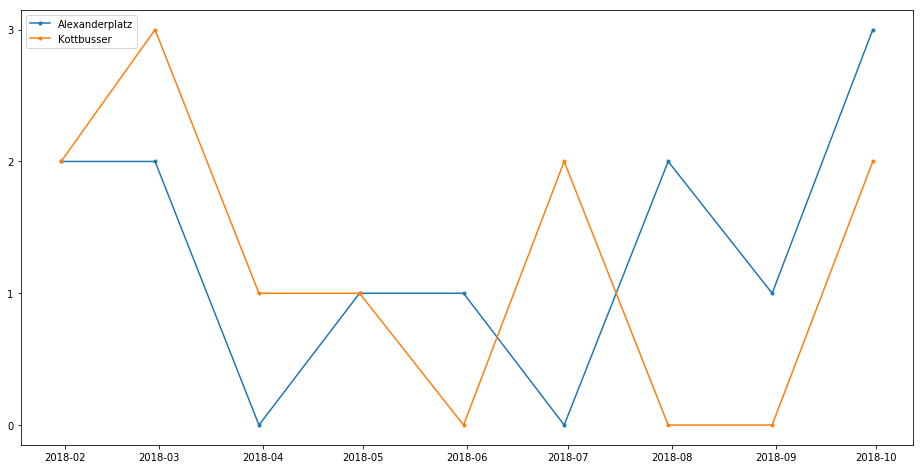

In [18]:
ax = plt.figure(figsize=(16,8)).gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(pol_df["Content"][pol_df["Content"].str.lower().str.contains('alexanderplatz')].resample('m').count(),'.-' ,label='Alexanderplatz')
plt.plot(pol_df["Content"][pol_df["Content"].str.lower().str.contains('kottbusser')].resample('m').count(),'.-', label='Kottbusser')
plt.legend(loc='best')
plt.show()

### Concordance

In [19]:
polrep_tokens = nltk.wordpunct_tokenize(pol_df['Content'].sum())
polrep_text = nltk.Text(polrep_tokens)
polrep_text.concordance("kottbusser")

Displaying 12 of 12 matches:
unsere Kolleginnen und Kollegen am Kottbusser Tor . Davon abgesehen , dass auch 
4 - jährigen Bruder am U - Bahnhof Kottbusser Tor auf den Treppenstufen zum Ausg
 seine Kollegin mit ihrem Wagen im Kottbusser Damm Ecke Urbanstraße an der roten
 gemeinsam in Richtung U - Bahnhof Kottbusser Tor , wo der 30 - Jährige leicht v
raße zwischen Schlesisches Tor und Kottbusser Tor mit stark überhöhter Geschwind
beide Fahrzeuge wieder in Richtung Kottbusser Tor unterwegs waren , gelang es de
Biomarkts und eines Discounters am Kottbusser Damm mehrere Einschlaglöcher in de
n fünf Mitarbeiter das Geschäft am Kottbusser Damm verlassen , als sie von zwei 
10 Uhr mit einem Sattelzug von der Kottbusser Straße rechts in die Skalitzer Str
ieg der Angreifer aus und lief zum Kottbusser Damm , wo ihn Passanten festhielte
en 19 . 30 Uhr auf dem U - Bahnhof Kottbusser Tor von einem Triebwagenführer der
ährige zwei Männer in dem Laden am Kottbusser Damm , die Kleidung an sich nahmen

### Similar context

In [20]:
polrep_text.similar('verletzt')

geschlagen er an und anschließend nach verletzte wurde getreten in
festgenommen beschädigt auf dort bedroht angegriffen da konnten
beleidigt ein


In [21]:
polrep_text.similar('überfall')

verkehrsunfall jährigen mann unfall einsatz unbekannten angriff messer
lokal raub raubüberfall brand streit feuer bus wagen gehweg einbruch
mehrfamilienhaus bmw


In [22]:
polrep_text.similar('bahn')

straßenbahn bahnzug wohnung filiale polizei gefangenensammelstelle
bahnhof mordkommission zivilstreife zunächst stadtautobahn beiden
ebertstraße a haustür tür männer dort täter feuerwehr


In [23]:
polrep_text.similar('flucht')

jährige polizei täter beamten frau straße ermittlungen männer fahrbahn
wohnung unfallbearbeitung flammen angestellte beiden polizisten
ermittler fahrer einsatzkräfte tatverdächtigen sich


In [24]:
polrep_text.similar('ungeklärt')

unklar unbekannt an in zeugen


In [25]:
polrep_text.similar('tot')

links kam unterwegs hand entlang den die kamen zurück das bereits
wurde ebenfalls gesperrt kommend rettungskräfte warf bis fand
schlichtend


In [26]:
polrep_text.similar('alexanderplatz')

gebäude hardenbergplatz unbekannten bundesplatz britz konto
mittelstreifen parteigebäude radweg becken kia paar askanierring arm
mai november vorderrad april restaurant streit


In [27]:
polrep_text.similar('kottbusser')

mariendorfer oranienburger schlesisches britzer spandauer steglitzer
brandenburger brunsbütteler müggelheimer falkenhagener fercher zeitzer
merseburger augsburger die rhinower revaler danziger rathenower
grottkauer


## Collocations

http://www.nltk.org/howto/collocations.html

In [28]:
polrep_text.collocations()

vergangenen Nacht; gestern Abend; beim Landeskriminalamt; stationären
Behandlung; zur stationären; der Polizeidirektion; der vergangenen;
weiteren Ermittlungen; mit einem; Polizeiliche Staatsschutz; ein
Krankenhaus; schwer verletzt; eine Klinik; Staatsschutz beim; gestern
Nachmittag; Ermittlungen übernommen; die Polizei; Alter von; Jahre
alten; Verkehrsermittlungsdienst der
